# Shooting method

In the following program, we will proceed to make the solution of the following equation through the trigger method.

$\ddot{x} = y(t) + v(t) + w(t)\dot{x}$

The initial values chosen are the following shown below

$x(t(0)) = 1$  ;  $x(t(250)) = 3.29$


In [1]:
#First, the necessary files are imported

from numpy import *
from pylab import *

In [2]:
class MetodoDisparo ():
    
    def __init__(self,a,b,z1,z2,t,error):
        
        #The parameters that will be constant are defined
        self.t = t
        self.valoriniciala = a
        self.valorinicialb = b
        self.z1 = z1
        self.z2 = z2
        self.error = error
        self.n = len( t )
        
        
    #The problem function is defined
    def funcion(self,t,x):
        
        return array([x[1], x[0]+4*exp(t)])
    
    #Runge-Kutta method for the trigger method
    def metodoRungeKutta(self,xinicial,valoresx):
        
        valoresy = array([xinicial]*self.n)
        
        for j in range (self.n - 1):
            
            h = valoresx[j + 1] - valoresx[j]
            k1 = self.funcion(valoresx[j],valoresy[j]) #K1
            k2 = self.funcion(valoresx[j] + 1/2*h,valoresy[j] + 1/2*h*k1) #K2
            k3 = self.funcion(valoresx[j] + 1/2*h,valoresy[j] + 1/2*h*k2) #K3
            k4 = self.funcion(valoresx[j] + h,valoresy[j] + h*k3) #K4
            
            valoresx[j + 1] = valoresx[j] + h
            valoresy[j + 1] = valoresy[j] + h/6*(k1 + 2*(k2 + k3) + k4)
            
        
        return valoresy
    
    #A function is defined to apply the method with the maximum desired iterations
    def solEDOS (self,maximo):
        
        #An initialization is done for the first part of the problem
        y = self.metodoRungeKutta([self.valoriniciala,self.z1],self.t)
        w1 = y[self.n-1,0]
        
        #We proceed to use the Runge-Kutta method to solve the equation
        for i in arange(maximo):
            
            y = self.metodoRungeKutta([self.valoriniciala,self.z2],self.t)
            w2 = y[self.n-1,0]
            
            #It is checked if we are at the minimum error threshold imposed on the problem
            if abs(self.valorinicialb - w2) < self.error:
                break
            
            #We calculate the new values for z1 and z2 for the following itinerary
            self.z1, self.z2 = ( self.z2, self.z2 + ( self.z2 - self.z1 )/( w2 - w1 ) * (self.valorinicialb - w2))
            w1 = w2
        
        return y[:,0]
        
        

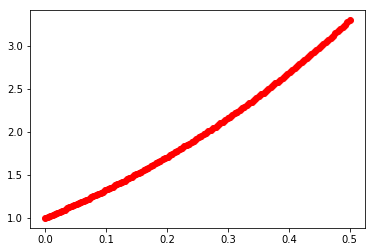

In [3]:
#The initial values of the method are imposed
a = 0.0
b = 0.5
t = linspace( a, b, 128)

#We proceed to initialize the class where the method is located
ejemplo = MetodoDisparo(exp(a),2*exp(b),3.0,4.0,t,1e-5)
solucion = ejemplo.solEDOS(128)

#Now we proceed to graph the values of the graph
plot( t,solucion,'ro')
draw()

